## Covid-19 Outbreak Analysis and Prediction

<img src="covid.jpg"/>

### 2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

### This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

### The data is available from 22 Jan, 2020.

In [1]:
#importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots
import seaborn as sns


from sklearn.model_selection import RandomizedSearchCV , train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
plt.style.use('seaborn')
import math
import random
import time
import operator

In [2]:
covid19 = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')

In [3]:
covid19.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid19['ObservationDate']=pd.to_datetime(covid19['ObservationDate'])
covid19['Last Update']=pd.to_datetime(covid19['Last Update'])

In [5]:
covid19.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [6]:
grouped = covid19.groupby('ObservationDate')['Last Update', 'Confirmed', 'Deaths'].sum().reset_index()

In [7]:
grouped.head()

,ObservationDate,Confirmed,Deaths
0,2020-01-22,555.0,17.0
1,2020-01-23,653.0,18.0
2,2020-01-24,941.0,26.0
3,2020-01-25,1438.0,42.0
4,2020-01-26,2118.0,56.0


### Worldwide Confirmed Cases Over Time and Logarithmic Scale

In [8]:

fig = px.line(grouped, x="ObservationDate", y="Confirmed", 
              title="Worldwide Confirmed Cases Over Time")
fig.show()

fig = px.line(grouped, x="ObservationDate", y="Confirmed", 
              title="Worldwide Confirmed Cases (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

### Worldwide Deaths Cases Over Time and Logarithmic Scale

In [9]:
fig = px.line(grouped, x="ObservationDate", y="Deaths", title="Worldwide Deaths Over Time",
             color_discrete_sequence=['#F42272'])
fig.show()

fig = px.line(grouped, x="ObservationDate", y="Deaths", title="Worldwide Deaths (Logarithmic Scale) Over Time", 
              log_y=True, color_discrete_sequence=['#F42272'])
fig.show()

### Sri Lanka Confirmed Cases Over Time

In [10]:
grouped_sl = covid19[covid19['Country/Region'] == "Sri Lanka"].reset_index()
grouped_sl_date = grouped_sl.groupby('ObservationDate')['ObservationDate', 'Confirmed', 'Deaths'].sum().reset_index()

In [11]:
grouped_sl_date.head()

,ObservationDate,Confirmed,Deaths
0,2020-01-27,1.0,0.0
1,2020-01-28,1.0,0.0
2,2020-01-29,1.0,0.0
3,2020-01-30,1.0,0.0
4,2020-01-31,1.0,0.0


In [12]:
fig = px.line(grouped_sl_date, x="ObservationDate", y="Confirmed", 
              title="Sri Lanka Confirmed Cases Over Time")
fig.show()

### China Confirmed Cases Over Time

In [13]:
grouped_china = covid19[covid19['Country/Region'] == "Mainland China"].reset_index()
grouped_ch_date = grouped_china.groupby('ObservationDate')['ObservationDate', 'Confirmed', 'Deaths'].sum().reset_index()

In [14]:
fig = px.line(grouped_ch_date, x="ObservationDate", y="Confirmed", 
              title="China Confirmed Cases Over Time")
fig.show()

### Italy Confirmed Cases Over Time

In [15]:
grouped_italy = covid19[covid19['Country/Region'] == "Italy"].reset_index()
grouped_italy_date = grouped_china.groupby('ObservationDate')['ObservationDate', 'Confirmed', 'Deaths'].sum().reset_index()

In [16]:
fig = px.line(grouped_italy_date, x="ObservationDate", y="Confirmed", 
              title="Italy Confirmed Cases Over Time")
fig.show()

### Whole World Cases over time

In [17]:
covid19['Active'] = covid19['Confirmed'] - (covid19['Deaths'] + covid19['Recovered'])
covid19_new = covid19
without_china = covid19[covid19['Country/Region'] != "Mainland China"]

In [18]:
line_data = covid19_new.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
line_data = line_data.melt(id_vars="ObservationDate", value_vars=['Confirmed', 'Active', 'Recovered', 'Deaths'], var_name='Case', value_name='Count')
fig = px.line(line_data, x='ObservationDate', y='Count', color='Case', title='Whole World Cases over time')
fig.show()

### China Cases over time

In [19]:
ch_data = covid19_new[covid19_new['Country/Region'] == 'Mainland China'].reset_index(drop=True)
ch_line_data = ch_data.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [20]:
ch_line_data = ch_line_data.melt(id_vars="ObservationDate", value_vars=['Confirmed', 'Active', 'Recovered', 'Deaths'], var_name='Case', value_name='Count')
fig = px.line(ch_line_data, x='ObservationDate', y='Count', color='Case', title='China Cases over time')
fig.show()

### Whole World active, recovered, deaths Percentage

In [21]:
last_data = covid19_new.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
last_data = last_data.reset_index()
last_data = last_data[last_data['ObservationDate'] == max(last_data['ObservationDate'])]
last_data = last_data.reset_index(drop=True)
last_data['Deaths %'] = round(100 * last_data['Deaths'] / last_data['Confirmed'], 2)
last_data['Recovered %'] = round(100 * last_data['Recovered'] / last_data['Confirmed'], 2)
last_data['Active %'] = round(100 * last_data['Active'] / last_data['Confirmed'], 2)
last_data.style.background_gradient(cmap='Pastel1')

,ObservationDate,Confirmed,Deaths,Recovered,Active,Deaths %,Recovered %,Active %
0,2020-03-23 00:00:00,378287,16497,100958,260832,4.36,26.69,68.95


In [22]:
pi_data = last_data.melt(id_vars="ObservationDate", value_vars=['Active', 'Deaths', 'Recovered'], var_name='Case', value_name='Count')
fig = px.pie(pi_data, values='Count', names='Case')
fig.show()

### Outside China, Rest of the World  recovered, deaths Percentage

In [23]:
wc_data = without_china.groupby(['ObservationDate'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
wc_data = wc_data.reset_index()
wc_data = wc_data[wc_data['ObservationDate'] == max(wc_data['ObservationDate'])]
wc_data = wc_data.reset_index(drop=True)
wc_data['Deaths Rate'] = round(100 * wc_data['Deaths'] / wc_data['Confirmed'], 2)
wc_data['Recovered Rate'] = round(100 * wc_data['Recovered'] / wc_data['Confirmed'], 2)
wc_data['Active Rate'] = round(100 * wc_data['Active'] / wc_data['Confirmed'], 2)
wc_data.style.background_gradient(cmap='Pastel1')

,ObservationDate,Confirmed,Deaths,Recovered,Active,Deaths Rate,Recovered Rate,Active Rate
0,2020-03-23 00:00:00,297171,13227,28249,255695,4.45,9.51,86.04


In [24]:
pi_data = wc_data.melt(id_vars="ObservationDate", value_vars=['Active', 'Deaths', 'Recovered'], var_name='Case', value_name='Count')
fig = px.pie(pi_data, values='Count', names='Case')
fig.show()

In [25]:
covid19['Province/State'] = covid19['Province/State'].fillna('')
temp = covid19[[col for col in covid19.columns if col != 'Province/State']]

latest = temp[temp['ObservationDate'] == max(temp['ObservationDate'])].reset_index()
latest_grouped = latest.groupby('Country/Region')['Confirmed', 'Deaths'].sum().reset_index()

In [26]:
fig = px.choropleth(latest_grouped, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", range_color=[1,5000], 
                    color_continuous_scale="peach", 
                    title='Countries with Confirmed Cases')
# fig.update(layout_coloraxis_showscale=False)
fig.show()

### Outside China Minimum 1000 Confirmed sorted by Deaths Rate

In [27]:
wc_bar_data = without_china.groupby(['ObservationDate', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
wc_bar_data = wc_bar_data.drop_duplicates(subset=["Country/Region"], keep='last')

wc_bar_data['Deaths Rate'] = round(100 * wc_bar_data['Deaths'] / wc_bar_data['Confirmed'], 2)
wc_bar_data['Recovered Rate'] = round(100 * wc_bar_data['Recovered'] / wc_bar_data['Confirmed'], 2)
wc_bar_data['Active Rate'] = round(100 * wc_bar_data['Active'] / wc_bar_data['Confirmed'], 2)

In [28]:
wc_bar_data = wc_bar_data[wc_bar_data['Confirmed'] > 1000]
wc_daths_rate = wc_bar_data
wc_daths_rate = wc_daths_rate.sort_values(by=['Deaths Rate'], ascending=False).reset_index(drop=True)
wc_daths_rate.style.background_gradient(cmap='Reds')

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,Active,Deaths Rate,Recovered Rate,Active Rate
0,2020-03-23 00:00:00,Italy,63927,6077,7432,50418,9.51,11.63,78.87
1,2020-03-23 00:00:00,Iran,23049,1812,8376,12861,7.86,36.34,55.8
2,2020-03-23 00:00:00,Spain,35136,2311,3355,29470,6.58,9.55,83.87
3,2020-03-23 00:00:00,UK,6726,336,140,6250,5,2.08,92.92
4,2020-03-23 00:00:00,Netherlands,4764,214,3,4547,4.49,0.06,95.45
5,2020-03-23 00:00:00,France,20123,862,2207,17054,4.28,10.97,84.75
6,2020-03-23 00:00:00,Japan,1128,42,235,851,3.72,20.83,75.44
7,2020-03-23 00:00:00,Turkey,1529,37,0,1492,2.42,0,97.58
8,2020-03-23 00:00:00,Belgium,3743,88,401,3254,2.35,10.71,86.94
9,2020-03-23 00:00:00,Brazil,1924,34,2,1888,1.77,0.1,98.13


### Cases per day over the time

In [29]:
cases_per_Day = covid19.groupby(["ObservationDate"])['Confirmed','Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1=cases_per_Day.sort_values('ObservationDate',ascending=False)

sorted_By_Confirmed1.style.background_gradient(cmap='Reds')

,ObservationDate,Confirmed,Deaths,Recovered
61,2020-03-23 00:00:00,378287,16497,100958
60,2020-03-22 00:00:00,335957,14634,97882
59,2020-03-21 00:00:00,304528,12973,91676
58,2020-03-20 00:00:00,272167,11299,87403
57,2020-03-19 00:00:00,242713,9867,84962
56,2020-03-18 00:00:00,214915,8733,83313
55,2020-03-17 00:00:00,197168,7905,80840
54,2020-03-16 00:00:00,181546,7126,78088
53,2020-03-15 00:00:00,167447,6440,76034
52,2020-03-14 00:00:00,156099,5819,72624


### Distribution plot of confirmed cases around the world 

In [30]:
#Grouping different types of cases as per the date
datewise=covid19.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise.head()

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0


Text(0.5, 1.0, 'Density Distribution Plot for Confirmed Cases')

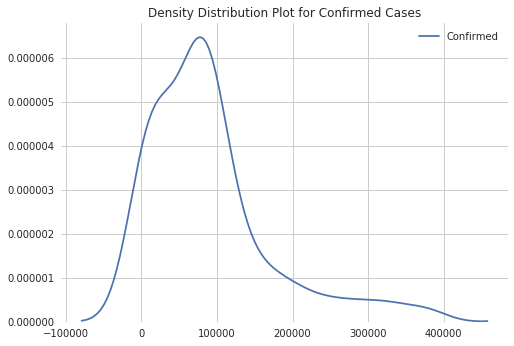

In [31]:
import seaborn as sns
sns.set_style("whitegrid")
sns.kdeplot(datewise["Confirmed"])
plt.title("Density Distribution Plot for Confirmed Cases")

Text(0.5, 1.0, 'Density Distribution Plot for Death Cases')

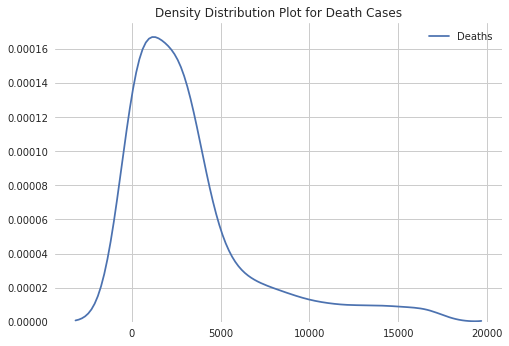

In [32]:


sns.kdeplot(datewise["Deaths"])
plt.title("Density Distribution Plot for Death Cases")

Text(0.5, 1.0, 'Density Distribution Plot for Death Cases')

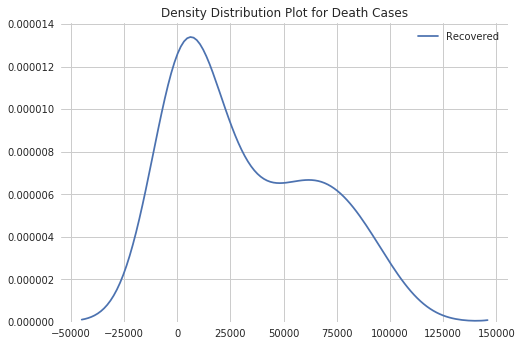

In [33]:
sns.kdeplot(datewise["Recovered"])
plt.title("Density Distribution Plot for Death Cases")

### Moratality and Recovery Rate analysis around the World

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



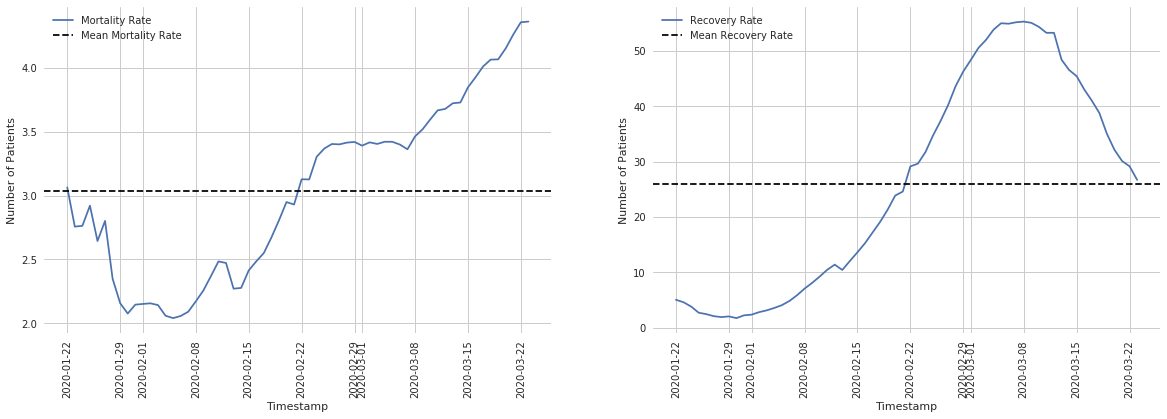

In [34]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate')
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate")
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

### Making Prediction

In [35]:
#load dataset
confirm_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv') 
death_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
recoverd_data = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')

In [36]:
cols = confirm_data.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [37]:
confirmed = confirm_data.loc[:,cols[4]:cols[-1]]
deaths = death_data.loc[:,cols[4]:cols[-1]]
recovered = recoverd_data.loc[:,cols[4]:cols[-1]]

In [38]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)

In [39]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [40]:
#future forcasting for the next 10 days

days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [41]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [42]:
#split in to train test data
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False) 

### predict using Support Vector Machine

In [43]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MAE: 16278.788744432222
MSE: 404306430.1462365


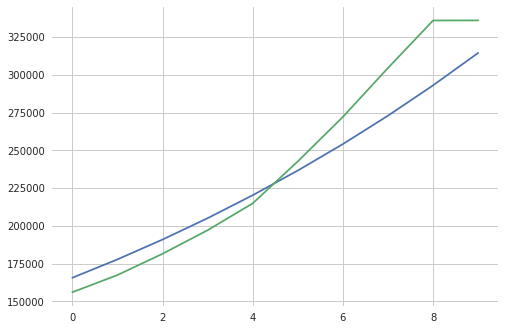

In [44]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

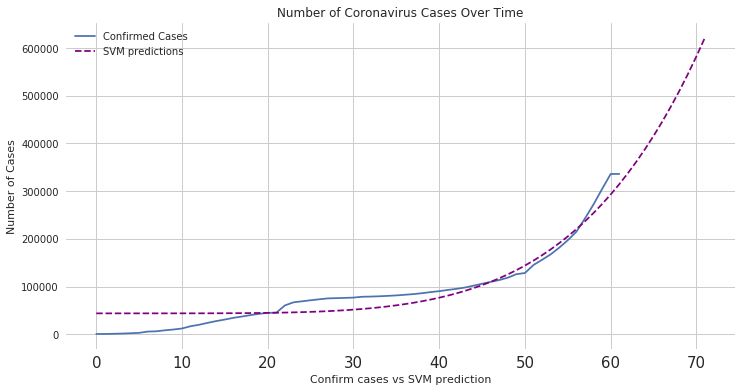

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('Number of Coronavirus Cases Over Time')
plt.xlabel('Confirm cases vs SVM prediction')
plt.ylabel('Number of Cases')
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.show()

In [46]:
print('SVM future predictions for 10 Days:')
set(zip(future_forcast_dates[-10:], svm_pred[-10:]))

SVM future predictions for 10 Days:


{('03/24/2020', 337438.59357835795),
 ('03/25/2020', 361897.49530278775),
 ('03/26/2020', 387959.6337177402),
 ('03/27/2020', 415702.5650939967),
 ('03/28/2020', 445206.30750088836),
 ('03/29/2020', 476553.3792719168),
 ('03/30/2020', 509828.83747032355),
 ('03/31/2020', 545120.3163547197),
 ('04/01/2020', 582518.0658446613),
 ('04/02/2020', 622114.9899862956)}

### predict using Linear Regression

In [47]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 103950.7148903923
MSE: 14146980783.748867


In [48]:
print(linear_model.coef_)
print(linear_model.intercept_)

[[2422.95371875]]
0.0


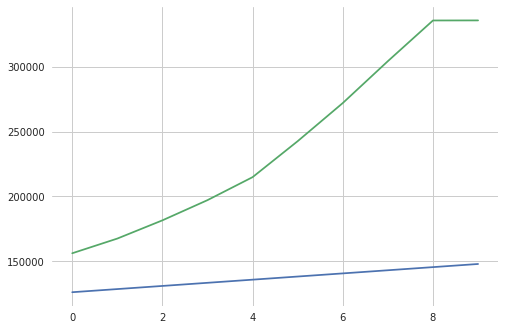

In [49]:
plt.plot(test_linear_pred)
plt.plot(y_test_confirmed)

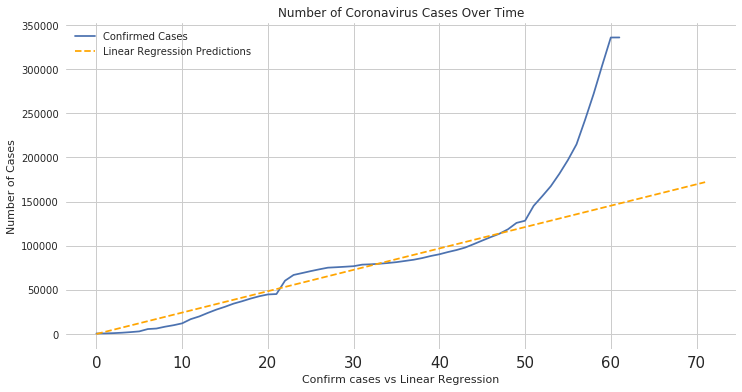

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Coronavirus Cases Over Time')
plt.xlabel('Confirm cases vs Linear Regression')
plt.ylabel('Number of Cases')
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.show()

In [51]:
# Future predictions using Linear Regression 
print('Linear regression future 10 predictions:')
print(linear_pred[-10:])

Linear regression future 10 predictions:
[[150223.13056276]
 [152646.08428151]
 [155069.03800026]
 [157491.99171902]
 [159914.94543777]
 [162337.89915653]
 [164760.85287528]
 [167183.80659403]
 [169606.76031279]
 [172029.71403154]]
